In [ ]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# defining the network
class Net(nn.Module):
  def __init__(self, n):
    super().__init__()
    # an affine operation: y = Wx + b
    self.n = n 
    self.fc1 = nn.Linear(n, n, bias=False)
    self.fc1.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc2 = nn.Linear(n, 1, bias=False)
    self.fc2.weight.data.normal_(0, 1/np.sqrt(n))

  def forward(self, x):
    x = self.fc1(x)
    z_hat = self.fc2(x)
    return z_hat

In [ ]:
def avg_k_test(net, x_input, n, k, steps, alpha, optimizer):

  iter_num = 1
  lossAvg = np.zeros(steps)
  for i in range(iter_num):
    lossVector = []
    #x_input = torch.randn(n)
    z_target = torch.tensor([1.])
    lossVector = []


    lr_SGD = alpha*(float(n)**(-k))
    lr_Adam = lr_SGD  #for now
    loss_f = nn.MSELoss()

    #optimizer:
    if optimizer == 'SGD':
      optimizer = optim.SGD(net.parameters(), lr_SGD) 
    if optimizer == 'Adam':
      optimizer = optim.Adam(net.parameters(), lr_Adam)
    
    for i in range(steps):
      optimizer.zero_grad()
      z_hat = net.forward(x_input)
      loss = loss_f(z_hat, z_target)
      lossVector.append(loss)
      loss.backward()
      optimizer.step()

  #   lossAvg += np.array(lossVector)
  
  # return lossAvg/iter_num

  return lossVector

(array([0. , 0.5, 1. , 1.5, 2. ]), 2, 200)

In [ ]:
n_sizes = np.array([100,1000])
n_n = len(n_sizes)
K = np.array([0,0.5,1,1.5,2])
n_k = len(K)
n_steps = 200
x = np.arange(n_steps)
losses = np.zeros((n_k, n_n, n_steps))

lr_100 = 0.5e-4

from copy import deepcopy

for i_n, n in enumerate(n_sizes):
  net = Net(n)
  sd_init = deepcopy(net.state_dict())
  x_input = torch.randn(n)
  for i_k, k in enumerate(K):
    net.load_state_dict(sd_init)
    alpha = lr_100 * 100**k
    loss_i = avg_k_test(net, x_input, n, k, n_steps, alpha, 'SGD')
    losses[i_k, i_n] = loss_i

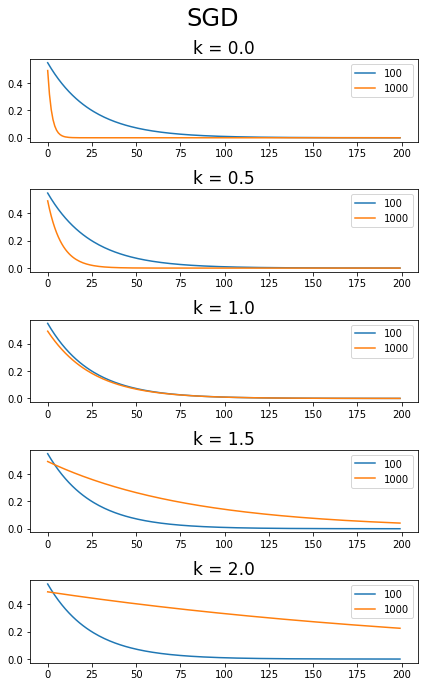

In [ ]:
# testing different k's for SGD

fig = plt.figure(figsize=(6, 10))
fig.suptitle('SGD', fontsize = 24)
axes = fig.subplots(n_k, 1)
for i_k, k in enumerate(K):
  ax1 = axes[i_k]
  STR = "k = " + str(k)
  for i_n, n in enumerate(n_sizes):
    loss_i = losses[i_k, i_n]
    ax1.plot(x, loss_i, label = n)
  #ax1.set_yscale("log")
  ax1.set_title(STR, fontsize=17)
  ax1.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:


lr_100 = 0.2e-4

for i_n, n in enumerate(n_sizes):
  net = Net(n)
  sd_init = deepcopy(net.state_dict())
  x_input = torch.randn(n)
  for i_k, k in enumerate(K):
    net.load_state_dict(sd_init)
    alpha = lr_100 * 100**k
    loss_i = avg_k_test(net, x_input, n, k, n_steps, alpha, 'Adam')
    losses[i_k, i_n] = loss_i

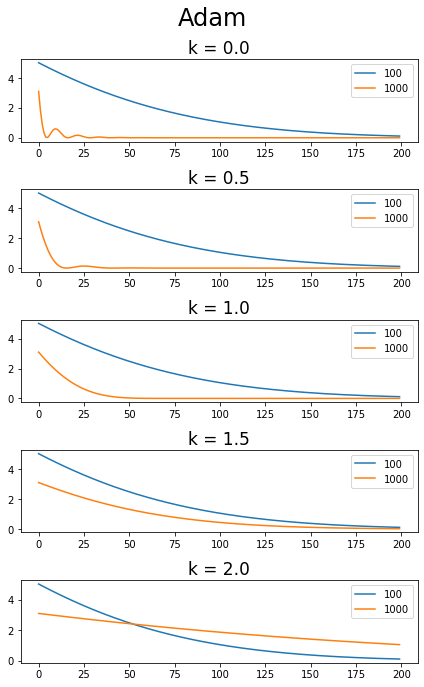

In [ ]:
# testing different k's for aDAM

fig = plt.figure(figsize=(6, 10))
fig.suptitle('Adam', fontsize = 24)
axes = fig.subplots(n_k, 1)
for i_k, k in enumerate(K):
  ax1 = axes[i_k]
  STR = "k = " + str(k)
  for i_n, n in enumerate(n_sizes):
    loss_i = losses[i_k, i_n]
    ax1.plot(x, loss_i, label = n)
  #ax1.set_yscale("log")
  ax1.set_title(STR, fontsize=17)
  ax1.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])